In [36]:
#MNIST Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.utils import np_utils

In [37]:
np.random.seed(42)

In [38]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


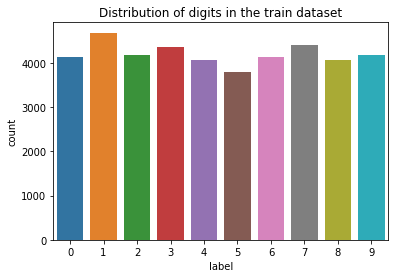

In [39]:
plt.figure()
ax = sns.countplot(train['label'])
plt.title("Distribution of digits in the train dataset")
plt.show()

In [40]:
features_train = train.columns[1:]
features_test = test.columns
X_train = train[features_train].astype('float32')
X_test = test[features_test].astype('float32')
Y_train = train['label']
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)


(42000, 784)
(42000,)
(28000, 784)


In [41]:
X_train /= 255
X_test /= 255

In [42]:
X_train = np.array(X_train).reshape(X_train.shape[0],28,28,1)
X_test = np.array(X_test).reshape(X_test.shape[0],28,28,1)
X_train[0].shape

(28, 28, 1)

In [43]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_train.shape

(42000, 10)

In [46]:
model = Sequential()
model.add(Convolution2D(32, (3,3), input_shape =(28,28,1)))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

from keras.callbacks import ModelCheckpoint
filepath = "weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor="val_acc", verbose=1, save_best_only= True, mode="max")
callbacks_list = [checkpoint]

history = model.fit(X_train, Y_train, batch_size = 100, epochs=10, validation_split = 0.2, verbose =1,callbacks = callbacks_list)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 592s 18ms/step - loss: 0.2457 - acc: 0.9228 - val_loss: 0.0756 - val_acc: 0.9762

Epoch 00001: val_acc improved from -inf to 0.97619, saving model to weights.best.hdf5
Epoch 2/10
33600/33600 [==============================] - 588s 18ms/step - loss: 0.0702 - acc: 0.9789 - val_loss: 0.0550 - val_acc: 0.9814

Epoch 00002: val_acc improved from 0.97619 to 0.98143, saving model to weights.best.hdf5
Epoch 3/10
33600/33600 [==============================] - 589s 18ms/step - loss: 0.0490 - acc: 0.9848 - val_loss: 0.0539 - val_acc: 0.9823

Epoch 00003: val_acc improved from 0.98143 to 0.98226, saving model to weights.best.hdf5
Epoch 4/10
33600/33600 [==============================] - 1211s 36ms/step - loss: 0.0342 - acc: 0.9887 - val_loss: 0.0582 - val_acc: 0.9825

Epoch 00004: val_acc improved from 0.98226 to 0.98250, saving model to weights.best.hdf5
Epoch 5/10
33600/33600 [=============

In [49]:
for layer in model.layers:
    print (layer.get_weights())

[array([[[[-2.31403355e-02,  1.99063197e-01,  1.18383080e-01,
          -3.30863625e-01,  7.49219954e-02,  2.09024534e-01,
           2.91795313e-01, -3.25480729e-01, -1.07354239e-01,
           2.25464329e-01,  1.90364316e-01,  3.94248068e-01,
           3.38234067e-01,  3.09410214e-01,  2.40118995e-01,
           7.85670057e-02, -3.10526609e-01, -1.80773243e-01,
          -1.40982032e-01,  1.96353808e-01,  3.73985916e-02,
          -5.84581047e-02,  1.39097556e-01, -5.36698848e-02,
           1.98476404e-01,  4.52533871e-01,  2.81227529e-01,
           4.12184924e-01,  1.94461018e-01, -4.26743925e-03,
          -6.63590804e-02,  2.67046481e-01]],

        [[-8.60252157e-02, -1.02442969e-02,  2.27810308e-01,
          -1.16760477e-01, -2.52781641e-02,  1.01633213e-01,
           2.67359078e-01, -1.49718774e-02,  2.29093626e-01,
           1.83329791e-01,  1.96873993e-01,  2.57254332e-01,
           3.53783876e-01,  1.99366719e-01,  7.48391673e-02,
           3.47837448e-01, -1.2508779

In [50]:
#saving the model
model_json = model.to_json()
open('mnist_architecture.json', 'w').write(model_json)

3158

In [58]:
prediction = model.predict_classes(X_test)

In [59]:
X_test[0].shape

(28, 28, 1)

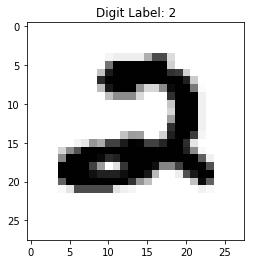

In [60]:
# Plot the image
plt.imshow(X_test[0].reshape(28,28), cmap='gray_r')
plt.title('Digit Label: {}'.format(prediction[0]))
plt.show()

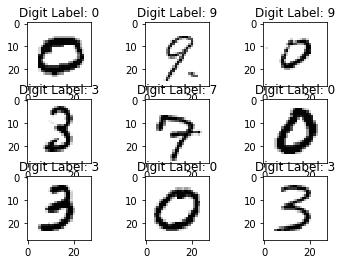

In [71]:
fig = plt.figure()
for i in [1,2,3,4,5,6,7,8,9]:
    ax = fig.add_subplot(3,3,i)
    ax.imshow(X_test[i].reshape(28,28), cmap='gray_r')
    ax.set_title('Digit Label: {}'.format(prediction[i]))

plt.show()